<a href="https://colab.research.google.com/github/alyahusnachoirunnisa/Rock-paper-scissor-image-classification/blob/main/img_classification_rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library

import zipfile, os
from google.colab import files
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

In [ ]:
# download dataset
#!wget --no-check-certificate \
#  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

In [ ]:
# unzip file
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

data_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4)

validation_datagen = ImageDataGenerator(
    rescale=1./225,
    validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# membangun model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\nAkurasi telah mencapai 99!')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# training model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps= len(validation_generator),
    callbacks=[model_checkpoint, early_stopping, callbacks],
    verbose=1)

Epoch 1/30
42/42 [==============================] - ETA: 0s - loss: 0.8741 - accuracy: 0.5419
Epoch 1: val_accuracy improved from -inf to 0.87757, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 25s 361ms/step - loss: 0.8741 - accuracy: 0.5419 - val_loss: 0.3830 - val_accuracy: 0.8776
Epoch 2/30
42/42 [==============================] - ETA: 0s - loss: 0.3092 - accuracy: 0.8851
Epoch 2: val_accuracy improved from 0.87757 to 0.93936, saving model to best_model.h5
42/42 [==============================] - 13s 310ms/step - loss: 0.3092 - accuracy: 0.8851 - val_loss: 0.1857 - val_accuracy: 0.9394
Epoch 3/30
42/42 [==============================] - ETA: 0s - loss: 0.2079 - accuracy: 0.9277
Epoch 3: val_accuracy did not improve from 0.93936
42/42 [==============================] - 12s 285ms/step - loss: 0.2079 - accuracy: 0.9277 - val_loss: 0.2404 - val_accuracy: 0.9199
Epoch 4/30
42/42 [==============================] - ETA: 0s - loss: 0.1935 - accuracy: 0.9414
Epoch 4: val_accuracy did not improve from 0.93936
42/42 [==============================] - 12s 274ms/step - loss: 0.1935 - accuracy: 0.9414 - val_loss: 0.2503 - val_accuracy: 0.9199
Ep

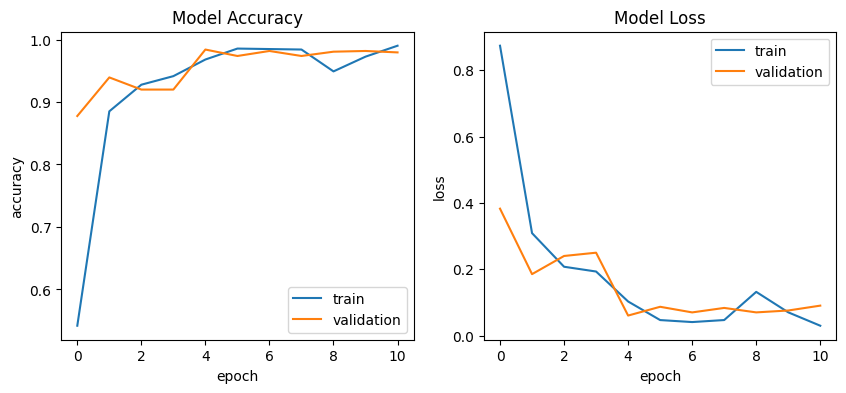

In [ ]:
# visualisasi performa model selama training
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

Saving gunting2.jpg to gunting2 (3).jpg
1/1 [==============================] - 0s 233ms/step
gunting2 (3).jpg
scissors


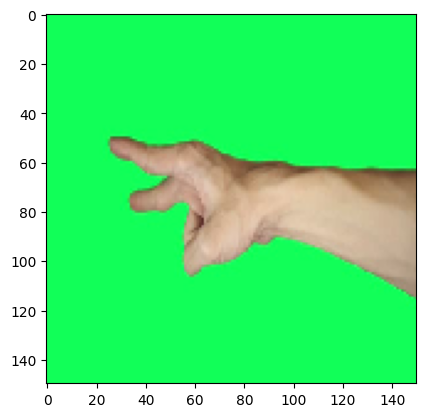

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown object')